In [2]:
#Import Statements

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#display matplotlib graphs in the notebook

In [13]:
import random
from pprint import pprint

In [5]:
#Load and prepare data

In [6]:
df=pd.read_csv("part_1_0.csv")
df= df.rename(columns={"reslt":"label"})

In [7]:
df.head()

,community,age,weight,history,Hb,IFA,BP,res,label
0,1,26,37,1,5.9,1,1.444444,1,0
1,1,21,42,1,9.2,1,1.375000,1,0
2,1,21,36,1,8.8,1,1.500000,1,0
3,1,21,36,1,9.2,1,2.125000,1,0
4,1,21,36,1,8.0,1,1.375000,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
community    101 non-null int64
age          101 non-null int64
weight       101 non-null int64
history      101 non-null int64
Hb           101 non-null float64
IFA          101 non-null int64
BP           101 non-null float64
res          101 non-null int64
label        101 non-null int64
dtypes: float64(2), int64(7)
memory usage: 7.2 KB


In [9]:
#Train-Test-Split

In [10]:
def train_test_split(df, test_size):
    indices= df.index.tolist()
    test_indices=random.sample(population=indices,k=test_size)
    test_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,test_df

In [11]:
len(df)

101

In [14]:
train_df, test_df = train_test_split(df, test_size=20)

In [15]:
len(test_df)

20

In [16]:
test_df.head()

,community,age,weight,history,Hb,IFA,BP,res,label
20,3,24,40,1,9.0,1,1.736946,1,0
39,4,24,48,1,9.6,1,1.333000,2,1
6,1,26,35,1,9.2,1,1.571429,1,0
23,1,27,36,1,8.0,1,1.571429,1,0
66,1,25,41,1,9.1,0,1.375000,1,1


In [17]:
test_df.head()

,community,age,weight,history,Hb,IFA,BP,res,label
20,3,24,40,1,9.0,1,1.736946,1,0
39,4,24,48,1,9.6,1,1.333000,2,1
6,1,26,35,1,9.2,1,1.571429,1,0
23,1,27,36,1,8.0,1,1.571429,1,0
66,1,25,41,1,9.1,0,1.375000,1,1


In [18]:
test_df.head()

,community,age,weight,history,Hb,IFA,BP,res,label
20,3,24,40,1,9.0,1,1.736946,1,0
39,4,24,48,1,9.6,1,1.333000,2,1
6,1,26,35,1,9.2,1,1.571429,1,0
23,1,27,36,1,8.0,1,1.571429,1,0
66,1,25,41,1,9.1,0,1.375000,1,1


In [19]:
len(train_df.values)

81

In [20]:
### Data Pure -check

In [22]:
def check_purity(data):
    label_column=data[:, -1]
    unique_classes=np.unique(label_column)
    if len(unique_classes)==1:
        return True
    else:
        return False    
    

In [23]:
###Classify

In [24]:
def classify_data(data):
    label_column=data[:, -1]
    unique_classes,counts_unique_classes=np.unique(label_column, return_counts=True)
    index=counts_unique_classes.argmax()
    classification=unique_classes[index]
    return classification

In [25]:
### Potential Splits

In [26]:
def get_potential_splits(data):
    potential_splits={}
    data.shape
    _, n_columns = train_df.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index]=[]
        values=data[:, column_index]
        unique_values=np.unique(values)
        for index in range(len(unique_values)):
            if index!=0:
                current_value=unique_values[index]
                previous_value=unique_values[index-1]
                potential_split= (current_value+previous_value)/2
                potential_splits[column_index].append(potential_split)
    return potential_splits

In [98]:
#data=train_df.values
potential_splits=get_potential_splits(train_df.values)

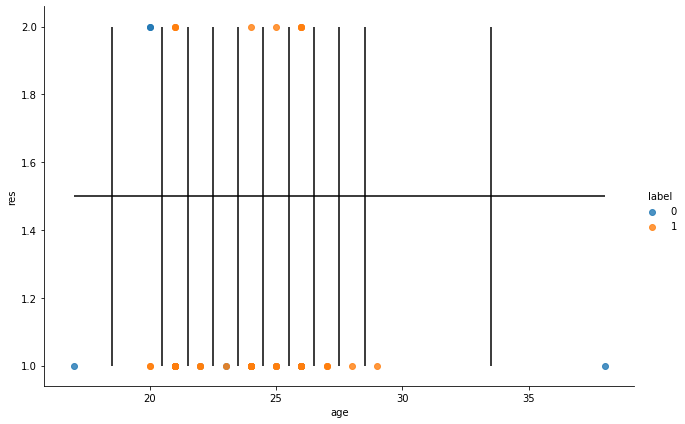

In [99]:
sns.lmplot(data=train_df,x="age",y="res",hue="label", fit_reg=False, height=6, aspect=1.5)
#plt.vlines(x=potential_splits[1], ymin=30, ymax=65)
#plt.hlines(y=potential_splits[7], xmin=17, xmax=38)
plt.vlines(x=potential_splits[1], ymin=1, ymax=2)
plt.hlines(y=potential_splits[7], xmin=17, xmax=38)


In [100]:
### Split Data

In [101]:
def split_data(data, split_column, split_value):
    split_column_values=data[:,split_column]
    data_below=data[split_column_values<=split_value]
    data_above=data[split_column_values>split_value]
    return data_below, data_above

In [102]:
data=train_df.values

In [103]:
data

array([[ 1.        , 26.        , 37.        ,  1.        ,  5.9       ,
         1.        ,  1.44444444,  1.        ,  0.        ],
       [ 1.        , 21.        , 42.        ,  1.        ,  9.2       ,
         1.        ,  1.375     ,  1.        ,  0.        ],
       [ 1.        , 21.        , 36.        ,  1.        ,  8.8       ,
         1.        ,  1.5       ,  1.        ,  0.        ],
       [ 1.        , 21.        , 36.        ,  1.        ,  9.2       ,
         1.        ,  2.125     ,  1.        ,  0.        ],
       [ 1.        , 21.        , 36.        ,  1.        ,  8.        ,
         1.        ,  1.375     ,  1.        ,  0.        ],
       [ 1.        , 24.        , 33.        ,  1.        ,  9.3       ,
         1.        ,  1.571     ,  1.        ,  0.        ],
       [ 4.        , 26.        , 31.        ,  1.        ,  9.        ,
         1.        ,  1.625     ,  1.        ,  0.        ],
       [ 1.        , 22.        , 30.        ,  1.        ,  9

In [104]:
split_column=2
split_value=37.5

In [105]:
data_below, data_above=split_data(data, split_column, split_value)

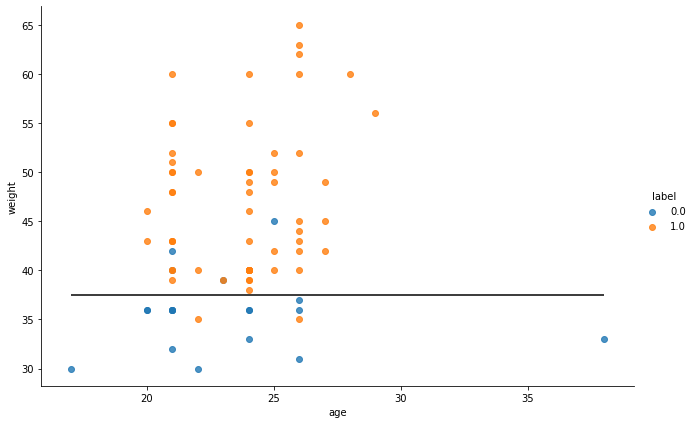

In [106]:
plotting_df=pd.DataFrame(data, columns=df.columns)
sns.lmplot(data=plotting_df, x="age",y="weight",hue="label", fit_reg=False, height=6, aspect=1.5)
plt.hlines(y=split_value, xmin=17, xmax=38)

In [107]:
### Lowest Overall Entropy

In [108]:
def calculate_entropy(data):
    label_column=data[:,-1]
    _, counts=np.unique(label_column, return_counts=True)
    probabilities=counts/counts.sum()
    entropy=sum(probabilities*(-np.log2(probabilities)))
    return entropy

In [109]:
calculate_entropy(data)

0.8063495153650777

In [110]:
def calculate_overall_entropy(data_below, data_above):
    n_data_points=len(data_below)+len(data_above)
    p_data_below=len(data_below)/n_data_points
    p_data_above=len(data_above)/n_data_points
    overall_entropy=(p_data_below*calculate_entropy(data_below)+p_data_above*calculate_entropy(data_above))

    return overall_entropy

In [111]:
calculate_overall_entropy(data_below,data_above)

0.37717710239639163

In [112]:
def determine_best_split(data, potential_splits):
    overall_entropy=999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above=split_data(data, split_column=column_index,split_value=value)
            current_overall_entropy=calculate_overall_entropy(data_below, data_above)
            if current_overall_entropy<= overall_entropy:
                overall_entropy=current_overall_entropy
                best_split_column=column_index
                best_split_value=value
    return best_split_column, best_split_value

In [113]:
potential_splits=get_potential_splits(data)


In [114]:
determine_best_split(data, potential_splits)

            

(2, 37.5)

In [115]:
### Decision Tree Algorithm

In [116]:
#sub_tree={question:[yes_answer,no_answer]}

In [117]:
{"weight<=37.5":[0,1]}

{'weight<=37.5': [0, 1]}

In [118]:
### Algorithm

In [200]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    #data preparations
    if counter==0:
        global COLUMN_HEADERS
        COLUMN_HEADERS=df.columns
        data=df.values
    else:
        data=df
    
    #base case
    if (check_purity(data)) or (len(data)<min_samples) or (counter==max_depth):
        classification=classify_data(data)
        return classification
    
    #recursive part
    else:
        counter+=1
        
        #helper functions
        potential_splits=get_potential_splits(data)
        split_column, split_value=determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        #instantiate subtree
        feature_name=COLUMN_HEADERS[split_column]
        question="{} <= {}".format(feature_name, split_value)
        sub_tree={question:[]}
        
        #find answers
        yes_answer=decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer=decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        if yes_answer==no_answer:
            sub_tree= yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
    return sub_tree

In [201]:
#pruning
tree=decision_tree_algorithm(train_df, max_depth=5)
pprint(tree)

{'weight <= 37.5': [{'weight <= 35.5': [{'weight <= 34.0': [0.0, 1.0]}, 0.0]},
                    {'weight <= 45.5': [{'BP <= 1.7256160915': [1.0,
                                                                {'BP <= 1.785139901': [0.0,
                                                                                       1.0]}]},
                                        1.0]}]}


In [202]:
df.columns

Index(['community', 'age', 'weight', 'history', 'Hb', 'IFA', 'BP', 'res',
       'label'],
      dtype='object')

In [203]:
### Classification


In [204]:
example=test_df.iloc[2]
example

community                       1
age                            26
weight                         35
history                         1
Hb                            9.2
IFA                             1
BP                        1.57143
res                             1
label                           0
classification                  1
classification_correct      False
Name: 6, dtype: object

In [205]:
def classify_example(example, tree):
    question=list(tree.keys())[0]
    feature_name, comparison_operator, value=question.split()

    #ask question
    if example[feature_name]<=float(value):
        answer=tree[question][0]
    else:
        answer=tree[question][1]

    #base case
    if not isinstance(answer, dict):
        return answer
    #recursive call of function
    else:
        residual_tree=answer
        return classify_example(example, residual_tree)
    

In [206]:
classify_example(example, tree)

1.0

In [207]:
example["weight"]<=37.5

True

In [208]:
### Accuracy

In [211]:
def calculate_accuracy(df, tree):
    df["classification"]=df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"]=df.classification==df.label
    
    accuracy=df.classification_correct.mean()*100
    return accuracy

In [212]:
calculate_accuracy(test_df, tree)

90.0

In [214]:
test_df.loc[6]

community                       1
age                            26
weight                         35
history                         1
Hb                            9.2
IFA                             1
BP                        1.57143
res                             1
label                           0
classification                  1
classification_correct      False
Name: 6, dtype: object

In [224]:
train_df, test_df =train_test_split(df, test_size=24)
tree=decision_tree_algorithm(train_df,max_depth=3)
accuracy=calculate_accuracy(test_df,tree)

pprint(tree)
print(accuracy)

{'weight <= 38.5': [0.0,
                    {'BP <= 1.7256160915': [1.0,
                                            {'BP <= 1.785139901': [0.0,
                                                                   1.0]}]}]}
100.0


In [225]:
df


,community,age,weight,history,Hb,IFA,BP,res,label
0,1,26,37,1,5.9,1,1.444444,1,0
1,1,21,42,1,9.2,1,1.375000,1,0
2,1,21,36,1,8.8,1,1.500000,1,0
3,1,21,36,1,9.2,1,2.125000,1,0
4,1,21,36,1,8.0,1,1.375000,1,0
...,...,...,...,...,...,...,...,...,...
96,3,21,55,1,9.0,0,1.375000,1,1
97,3,24,39,6,8.4,0,1.500000,1,1
98,3,24,50,1,9.1,0,1.375000,1,1
99,1,24,38,1,9.1,0,1.696758,1,1


In [227]:
test_df

,community,age,weight,history,Hb,IFA,BP,res,label,classification,classification_correct
82,1,20,46,1,9.0,1,1.714286,1,1,1.0,True
67,4,21,55,1,8.0,1,1.571429,2,1,1.0,True
88,3,21,43,1,9.0,1,1.375000,1,1,1.0,True
75,3,26,44,1,11.0,1,1.571429,1,1,1.0,True
5,1,24,33,1,9.3,1,1.571000,1,0,0.0,True
73,3,24,40,1,9.3,1,1.375000,1,1,1.0,True
13,1,21,32,1,9.0,0,1.736946,1,0,0.0,True
25,4,24,36,1,9.0,0,1.661538,1,0,0.0,True
10,4,17,30,1,9.0,0,1.375000,1,0,0.0,True
38,4,26,65,1,9.0,1,1.375000,2,1,1.0,True
